# 22-8-24: Practical No. 3.4.6 : Classification using ScikitLearn.

## Faraz Syed |  SAP ID : 40518220007 |  Roll. No. : J008

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\loan-train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [8]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [10]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [11]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [12]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df = data.dropna()

In [14]:
df.shape

(480, 13)

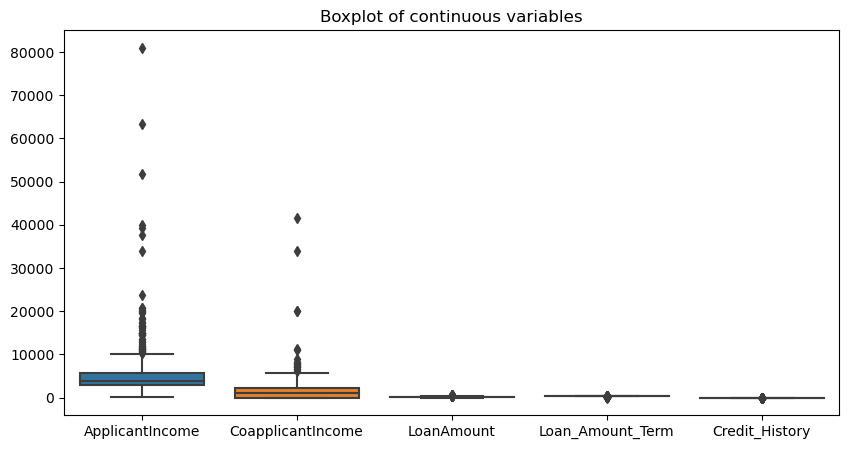

In [15]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data = data)
plt.title('Boxplot of continuous variables')
plt.show()

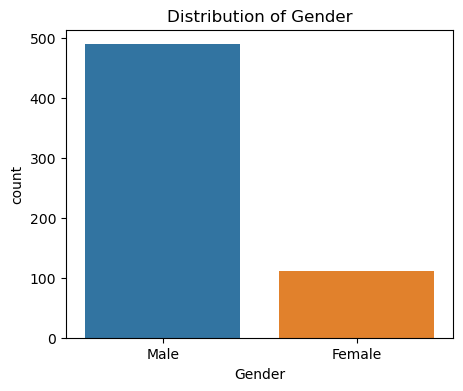

In [16]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Gender', data = data)
plt.title('Distribution of Gender')
plt.show()

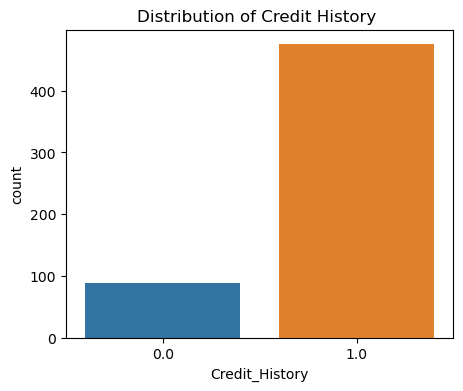

In [17]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Credit_History', data = data)
plt.title('Distribution of Credit History ')
plt.show()

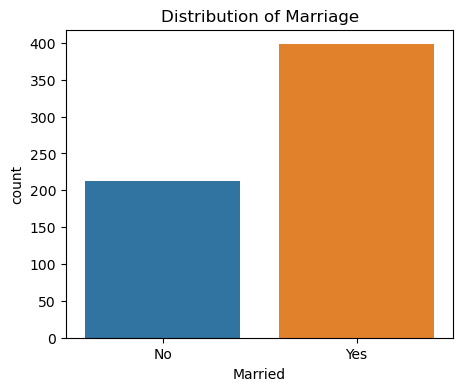

In [18]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Married', data = data)
plt.title('Distribution of Marriage')
plt.show()

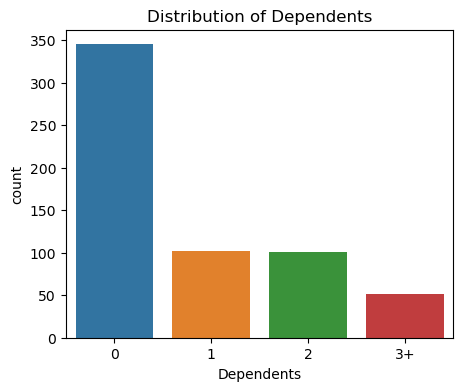

In [19]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Dependents', data = data)
plt.title('Distribution of Dependents')
plt.show()

<Figure size 1000x400 with 0 Axes>

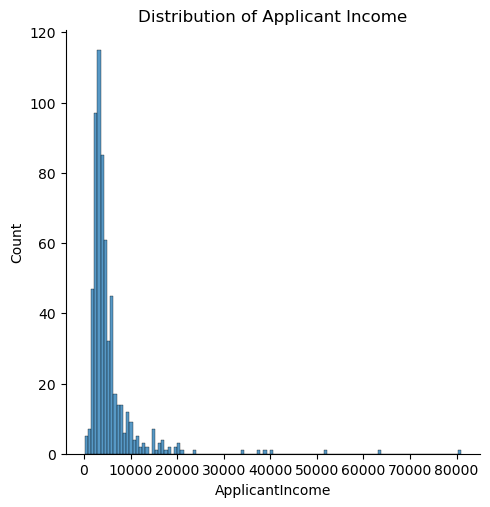

In [20]:
fig = plt.figure(figsize=(10,4))
sns.displot(data['ApplicantIncome'])
plt.title('Distribution of Applicant Income')
plt.show()

<Figure size 700x400 with 0 Axes>

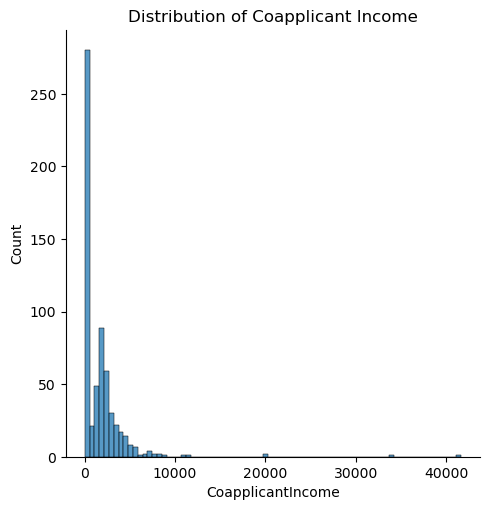

In [21]:
fig = plt.figure(figsize=(7,4))
sns.displot(data['CoapplicantIncome'])
plt.title('Distribution of Coapplicant Income')
plt.show()

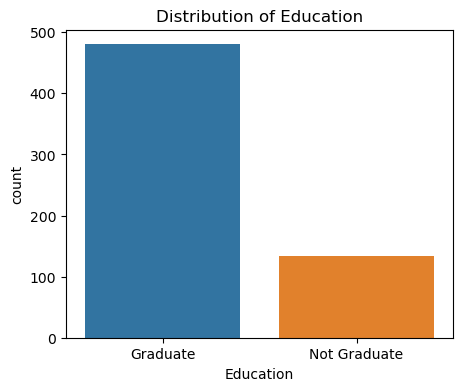

In [22]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Education', data = data)
plt.title('Distribution of Education')
plt.show()

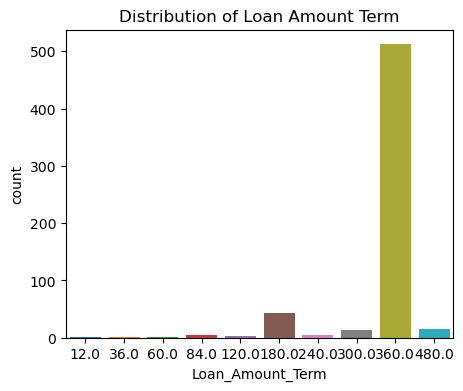

In [23]:
fig = plt.figure(figsize=(5,4))
sns.countplot(x = 'Loan_Amount_Term', data = data)
plt.title('Distribution of Loan Amount Term')
plt.show()

<Figure size 500x400 with 0 Axes>

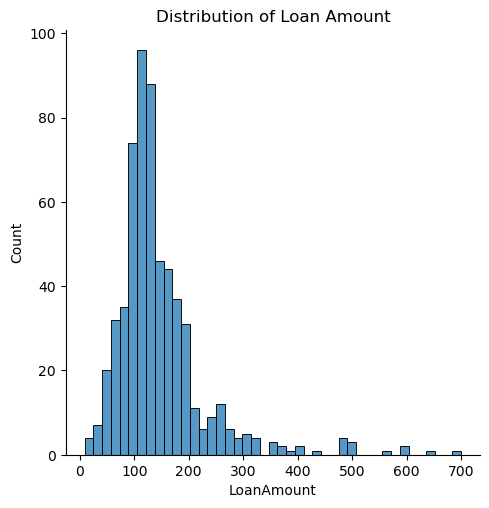

In [24]:
fig = plt.figure(figsize=(5,4))
sns.displot(data['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.show()

In [25]:
df = data.copy()

In [26]:
# Dropping variable 'Dependents' as the missing values within it cannot be imputed. 
df = df.drop('Dependents', axis = 1)

In [27]:
df.head(2)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [28]:
# using imputer to replace missing values in the categorical columns. 

from sklearn.impute import SimpleImputer
cat_cols = ['Gender','Married','Self_Employed','Loan_Amount_Term','Credit_History']
imputer = SimpleImputer(strategy = 'most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [29]:
# using median to replace missing values in LoanAmount.

median_value = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_value, inplace=True)

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

In [32]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [33]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [34]:
df=df.drop(['Loan_ID'],axis="columns")

In [35]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(float)
df['Credit_History']=df['Credit_History'].astype(float)

In [36]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   614 non-null    int64  
 1   Married                  614 non-null    int64  
 2   Education                614 non-null    int64  
 3   Self_Employed            614 non-null    int64  
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               614 non-null    float64
 7   Loan_Amount_Term         614 non-null    float64
 8   Credit_History           614 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Property_Area_Semiurban  614 non-null    uint8  
 11  Property_Area_Urban      614 non-null    uint8  
dtypes: float64(4), int64(6), uint8(2)
memory usage: 49.3 KB


In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state =123)
X_train.shape,X_test.shape

((491, 11), (123, 11))

#### (i) KNN 

In [39]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

acc=[]
from sklearn import metrics
for i in range(1,20):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test,yhat))

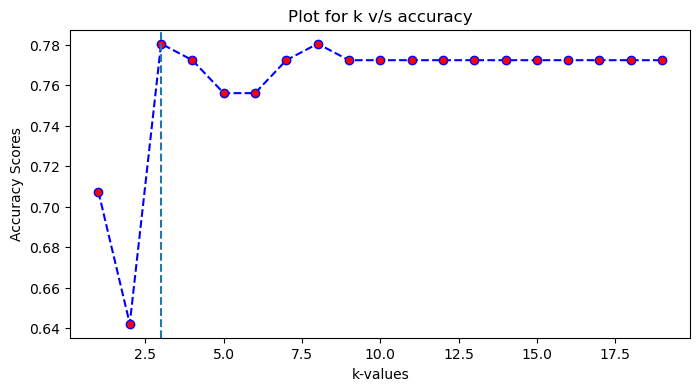

Maximum value of accuracy is: 0.7804878048780488 at k = 3


In [41]:
plt.figure(figsize=(8,4))
plt.plot(range(1,20),acc,linestyle="--",marker="o",color="blue",markerfacecolor='red')
plt.axvline(acc.index(max(acc))+1,linestyle="--")
plt.xlabel("k-values")
plt.ylabel("Accuracy Scores")
plt.title("Plot for k v/s accuracy")
plt.show()
print("Maximum value of accuracy is:", max(acc), "at k =",acc.index(max(acc))+1)

In [42]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Precision: %.3f' % precision_score(y_test, y_pred))

print('Recall: %.3f' % recall_score(y_test, y_pred))

print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.7723577235772358
Precision: 0.757
Recall: 0.963
F1 Score: 0.848


#### (ii) Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [45]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy (in %):",metrics.accuracy_score(y_test,y_pred)*100)

Gaussian Naive Bayes model accuracy (in %): 77.23577235772358


#### (iii) Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

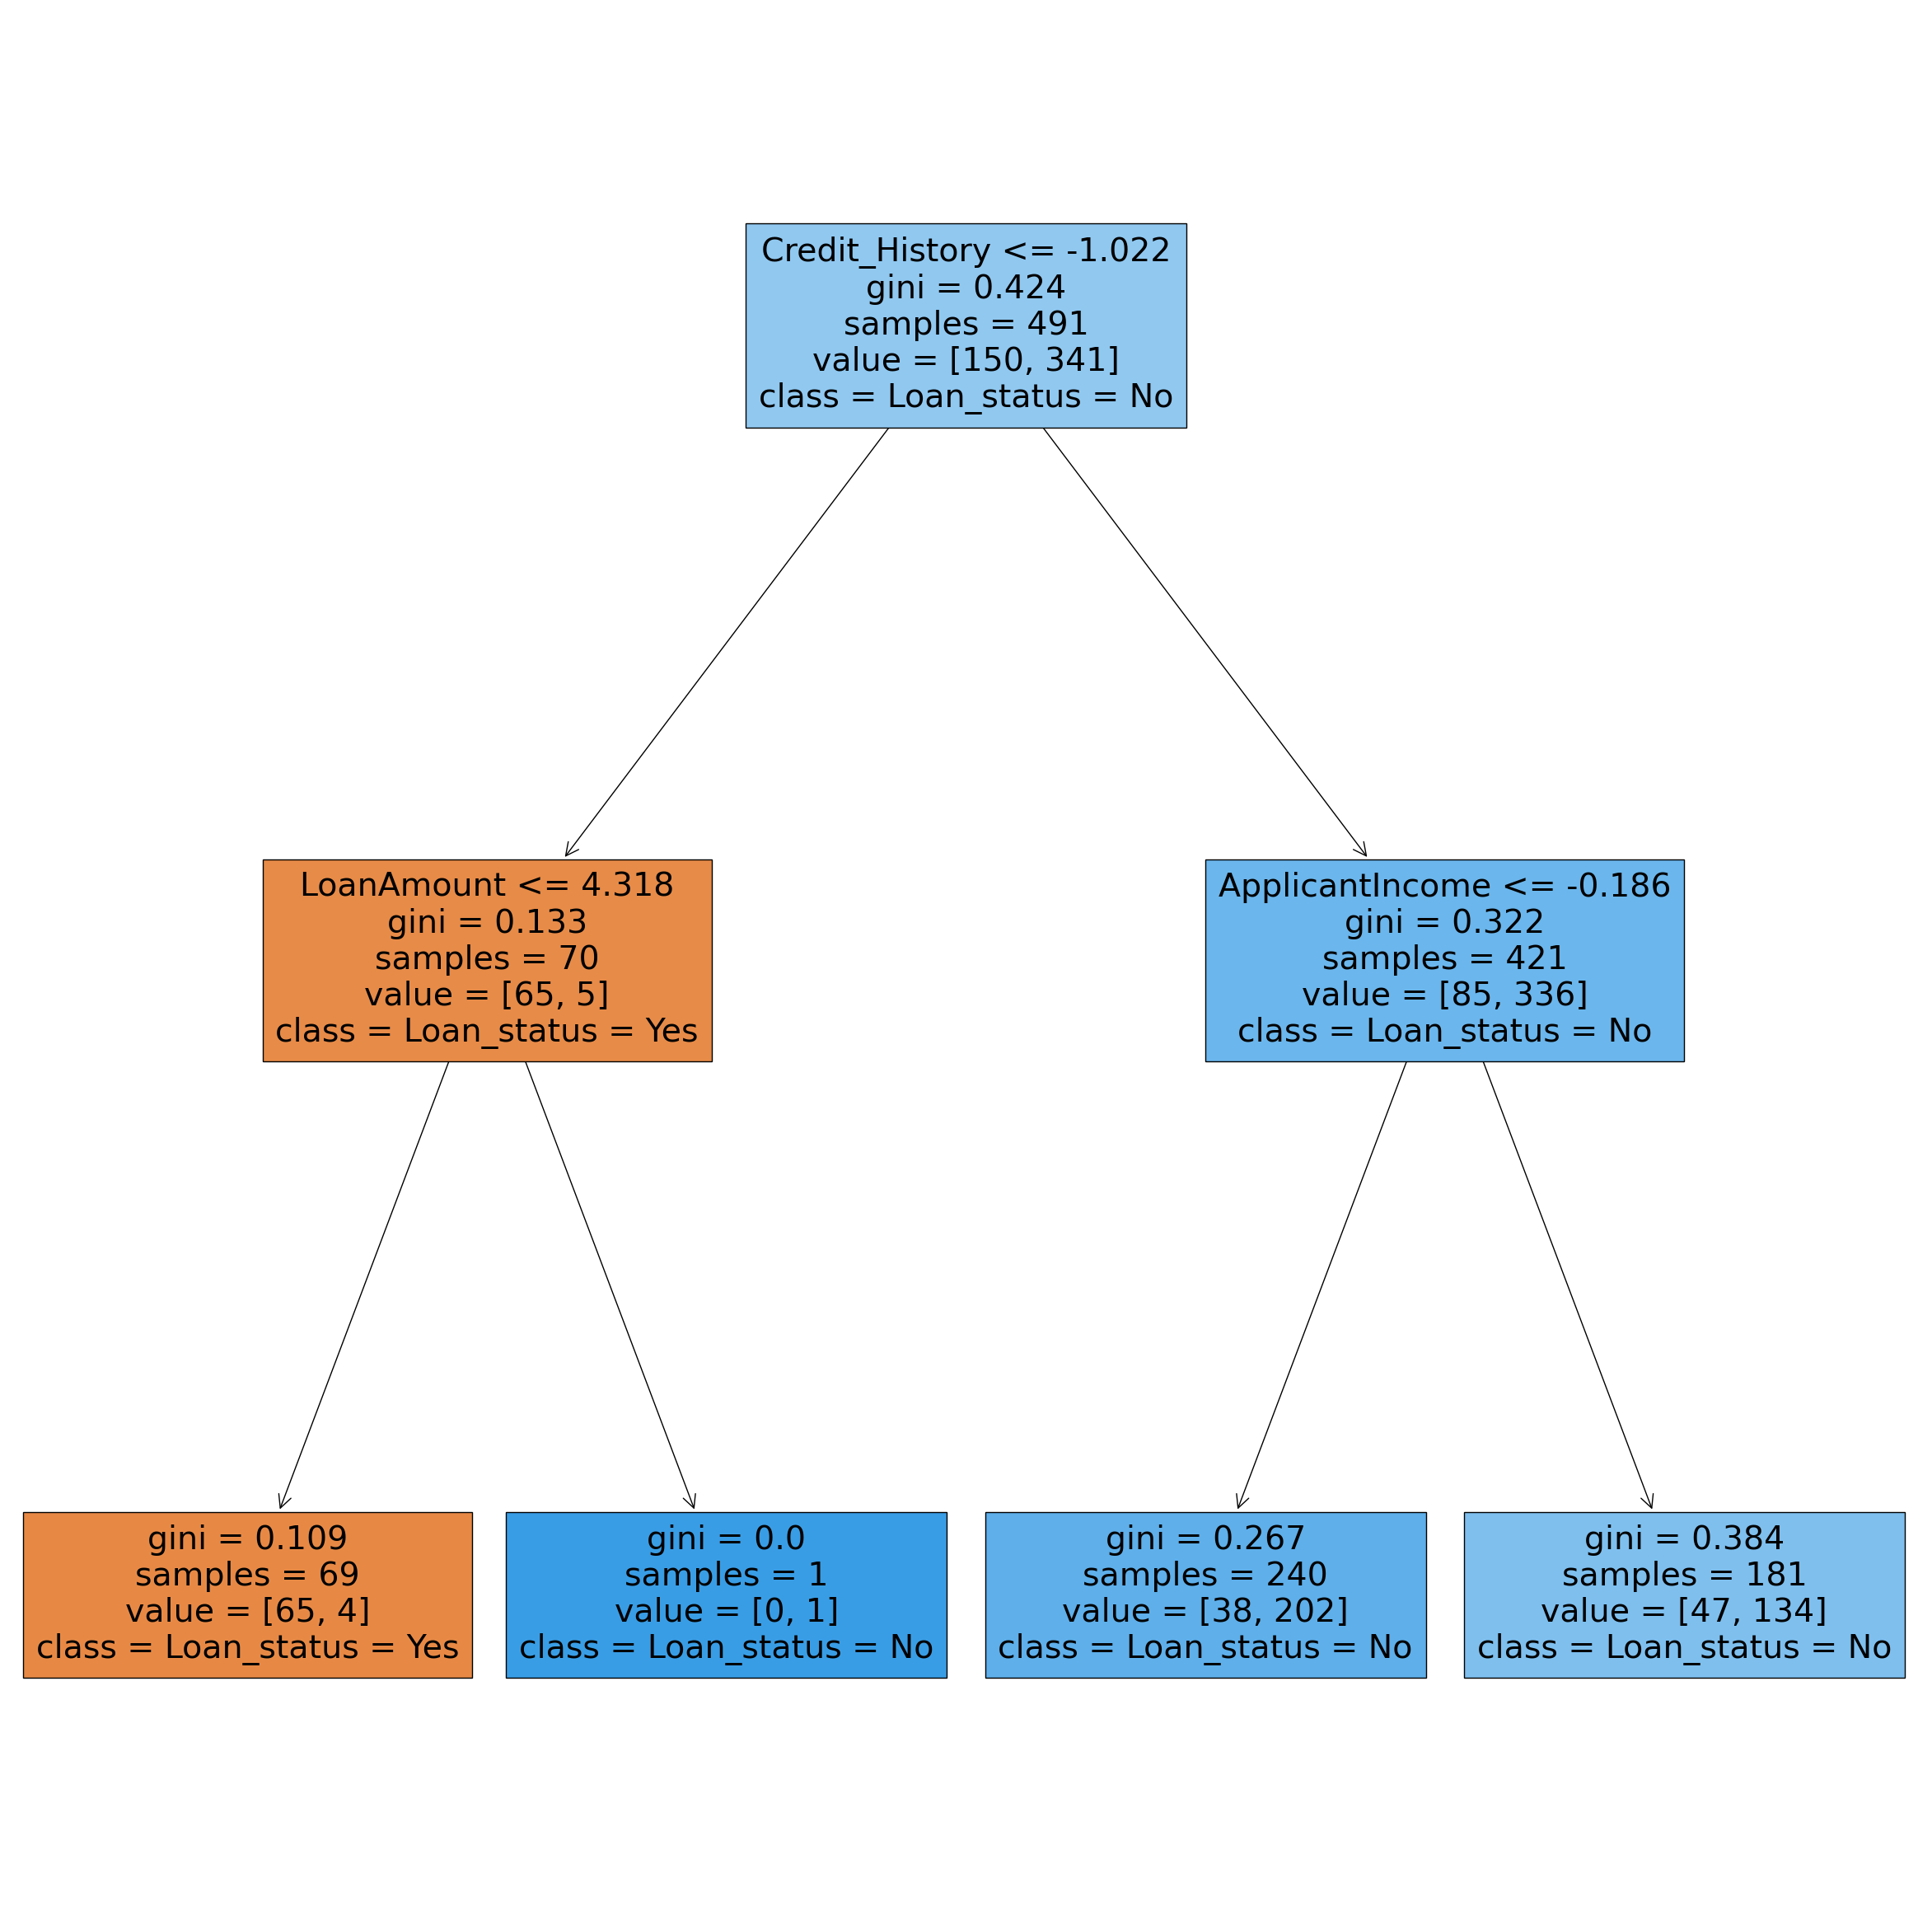

In [48]:
from sklearn import tree
fig = plt.figure(figsize = (30,30))
DC = tree.plot_tree(dt,feature_names =X.columns,
                  class_names = ['Loan_status = Yes','Loan_status = No'],
                  filled =True)

In [49]:
category_counts = df['Loan_Status'].value_counts()
print(category_counts)

1    422
0    192
Name: Loan_Status, dtype: int64


In [50]:
parameters = {'criterion':['gini','entropy','log_loss'],
             'splitter':['best','random'],
             'max_depth':[1,2,3,4,5],
             'max_features':['auto','sqrt','log2']}
# gives exact same names as the function takes 

In [51]:
dt2 = DecisionTreeClassifier(random_state=42)

In [52]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dt2,param_grid = parameters, cv = 5, scoring = 'accuracy')

In [53]:
cv.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [54]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'splitter': 'random'}

In [55]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
score = accuracy_score(y_test_pred,y_test)
print('The accuracy is =', score*100,'%')

The accuracy is = 77.23577235772358 %


In [58]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.38      0.89      0.53        18
           1       0.98      0.75      0.85       105

    accuracy                           0.77       123
   macro avg       0.68      0.82      0.69       123
weighted avg       0.89      0.77      0.80       123



#### (iv) Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_samples = 0.7, random_state = 42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(y_pred)

[1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1]


In [60]:
from sklearn import metrics
print('Accuracy of the model : ', metrics.accuracy_score(y_test,y_pred))

Accuracy of the model :  0.7886178861788617


In [61]:
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                  # Whether bootstrap samples are used when building trees
}

In [62]:
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid, 
                           cv=5,                              # Number of cross-validation folds
                           scoring='accuracy')                         
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 397, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\P

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.7, random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [106]:
print("Best parameters found: ", grid_search.best_params_)

# Best score
print("Best score: ", grid_search.best_score_)

# Retrieve the best model
best_rf = grid_search.best_estimator_

Best parameters found:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  0.8146567717996289


In [107]:
y_pred = best_rf.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123

Accuracy Score:  0.7804878048780488


In [108]:
feature_imp = pd.Series(rfc.feature_importances_,index = X.columns).sort_values(ascending = False)
print(feature_imp)

Credit_History             0.268902
ApplicantIncome            0.228869
LoanAmount                 0.200764
CoapplicantIncome          0.121821
Loan_Amount_Term           0.044832
Property_Area_Semiurban    0.027468
Married                    0.025858
Property_Area_Urban        0.024051
Education                  0.019922
Self_Employed              0.019256
Gender                     0.018255
dtype: float64
